In [1]:
import os
from uuid import uuid4
import hail as hl


spark_master_host = os.environ.get('SPARK_MASTER_HOST')
spark_master_port = os.environ.get('SPARK_MASTER_PORT')
localfs_path = os.environ.get('SCRATCH_LOCAL')

hl.init(
    master=f'spark://{spark_master_host}:{spark_master_port}',
    tmp_dir=os.path.join(localfs_path, 'hail-tmpdir'),
    default_reference='GRCh38',
    spark_conf={'spark.driver.memory': '40G', 'spark.executor.memory': '80G'},
    log=f'/net/archive/groups/plggneuromol/matzieb/hail-log/hail-log-{str(uuid4())}.log',
)

2021-12-20 15:29:57 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2021-12-20 15:29:58 WARN  SparkConf:69 - Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


Running on Apache Spark version 3.1.2
SparkUI available at http://p0620.prometheus:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.79-f141af259254
LOGGING: writing to /net/archive/groups/plggneuromol/matzieb/hail-log/hail-log-ed28fa3d-7e2f-4bae-a67e-498e32eac9b6.log


In [2]:
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()
 

Loading BokehJS ...

In [3]:
# Read vcf and reduce data
# mt = hl.import_vcf(
#     '/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/data/prs-data/1kg-sportsmen-merged.vcf.gz',
#     array_elements_required=False,
#     force_bgz = True,
#     find_replace=('\tinf\t', '\t50\t')
# )
# # filter rows with p = 0.001
# mt = mt.sample_rows(0.001, seed = 42)

In [4]:
# mt.write('/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/data/prs-data/sample-1kg-sportsmen-merged.mt', overwrite=True)

In [3]:
mt = hl.read_matrix_table('/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/data/prs-data/sample-1kg-sportsmen-merged.mt')

In [4]:
mt.describe()
mt.count()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
----------------------------------------
Row fields:
    'locus': locus<GRCh38>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AF: array<float64>, 
        AC: array<int32>, 
        NS: int32, 
        AN: int32, 
        EAS_AF: array<float64>, 
        EUR_AF: array<float64>, 
        AFR_AF: array<float64>, 
        AMR_AF: array<float64>, 
        SAS_AF: array<float64>, 
        VT: array<str>, 
        EX_TARGET: bool, 
        DP: int32, 
        BaseQRankSum: float64, 
        END: int32, 
        ExcessHet: float64, 
        FS: float64, 
        InbreedingCoeff: float64, 
        MLEAC: array<int32>, 
        MLEAF: array<float64>, 
        MQ: float64, 
        MQRankSum: float64, 
        QD: float64, 
        RAW_MQandDP: array<int32>, 
        ReadPosRankSum: float64, 
   

(78280, 2650)

In [5]:
# read table with meta data
table = (hl.import_table('/net/archive/groups/plggneuromol/imdik-zekanowski-sportwgs/data/prs-data/1kg-sportsmen-pheno.tsv', impute=True)
         .key_by('sample'))

2021-12-20 15:30:04 Hail: WARN: Name collision: field 'sample' already in object dict. 
  This field must be referenced with __getitem__ syntax: obj['sample']
2021-12-20 15:30:04 Hail: INFO: Reading table to impute column types
2021-12-20 15:30:07 Hail: INFO: Finished type imputation            (0 + 1) / 1]
  Loading field 'sample' as type str (imputed)
  Loading field 'pop' as type str (imputed)
  Loading field 'super_pop' as type str (imputed)
  Loading field 'gender' as type str (imputed)
  Loading field 'group' as type str (imputed)


In [6]:
# adding meta data into matrix table
mt = mt.annotate_cols(pheno = table[mt.s])

In [7]:
mt.aggregate_cols(hl.agg.counter(mt.pheno.super_pop))


frozendict({'AFR': 660, 'AMR': 347, 'EAS': 504, 'EUR': 503, 'SAS': 489, 'sportsman': 102, None: 45})

In [8]:
mt = mt.filter_cols(mt.pheno.super_pop != "NA")

In [9]:
mt.aggregate_cols(hl.agg.counter(mt.pheno.super_pop))

frozendict({'AFR': 660, 'AMR': 347, 'EAS': 504, 'EUR': 503, 'SAS': 489, 'sportsman': 102})

In [10]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'pheno': struct {
        pop: str, 
        super_pop: str, 
        gender: str, 
        group: str
    }
----------------------------------------
Row fields:
    'locus': locus<GRCh38>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AF: array<float64>, 
        AC: array<int32>, 
        NS: int32, 
        AN: int32, 
        EAS_AF: array<float64>, 
        EUR_AF: array<float64>, 
        AFR_AF: array<float64>, 
        AMR_AF: array<float64>, 
        SAS_AF: array<float64>, 
        VT: array<str>, 
        EX_TARGET: bool, 
        DP: int32, 
        BaseQRankSum: float64, 
        END: int32, 
        ExcessHet: float64, 
        FS: float64, 
        InbreedingCoeff: float64, 
        MLEAC: array<int32>, 
        MLEAF: array<float64>, 
        MQ: float64, 
        MQR

In [11]:
# execute pca on matrix table
eigenvalues, pcs, _ = hl.hwe_normalized_pca(mt.GT)

2021-12-20 15:30:14 Hail: INFO: hwe_normalize: found 76496 variants after filtering out monomorphic sites.
2021-12-20 15:30:19 Hail: INFO: pca: running PCA with 10 components... 2) / 327]


In [12]:
print(eigenvalues)
pcs.show(5, width=100)
mt = mt.annotate_cols(scores = pcs[mt.s].scores)

[46.957721792175235, 15.030188722578302, 5.991234608757422, 4.372042668284087, 4.013099499014388, 3.0490467934324603, 2.552746022867231, 2.488035851583288, 2.4762415375940985, 2.444930135827245]


,
s,scores
str,array<float64>
"""B102""","[7,88e-02,8,84e-02,-3,56e-02,-3,93e-02,-1,90e-03,4,79e-05,3,59e-05,5,45e-04,-1,02e-03,-8,07e-04]"
"""B156""","[7,40e-02,8,76e-02,-3,60e-02,-3,89e-02,-3,86e-03,3,55e-04,8,07e-04,5,61e-04,-1,99e-03,3,61e-04]"
"""B24""","[7,41e-02,1,01e-01,-3,74e-02,-2,87e-02,-1,20e-03,1,14e-03,7,56e-04,7,88e-04,-1,24e-03,-1,42e-03]"
"""B338""","[7,60e-02,8,89e-02,-3,08e-02,-4,57e-02,-3,30e-03,-1,09e-03,-2,73e-05,1,08e-03,-4,26e-03,8,13e-05]"
"""B382""","[7,79e-02,9,22e-02,-3,27e-02,-3,71e-02,-3,74e-03,5,13e-04,-6,88e-04,2,89e-03,-1,25e-03,-8,99e-04]"


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import CategoricalColorMapper
mapper = CategoricalColorMapper(palette=["red", "yellow", "green", "blue", "purple", "orange"], factors=["AFR", "AMR", "EAS", "EUR", "SAS", "sportsman"])
palette = dict(sportsman="orange", AFR="red", AMR="yellow", EAS="green", EUR="blue", SAS="purple")
sns.set_style('darkgrid')

In [89]:
# plot for pca
p = hl.plot.scatter(mt.scores[0],
                    mt.scores[1],
                    label=mt.pheno.super_pop,
                    colors=mapper, 
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)

2021-12-20 16:39:05 Hail: INFO: Coerced sorted dataset


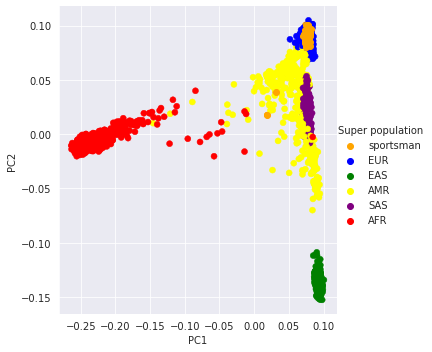

In [122]:
pca_df = mt.cols().flatten().to_pandas(flatten = True).rename(columns={'pheno.super_pop': 'super_pop'})
pca_df[['PC1','PC2', 'PC3','PC4', 'PC5', 
        'PC6', 'PC7', 'PC8', 'PC9', 'PC10']] = pd.DataFrame(pca_df.scores.tolist(), 
                                                            index = pca_df.index)
sns.relplot(x='PC1', 
            y='PC2', 
            hue='super_pop',
            palette=palette,
            edgecolor=None,
            data=pca_df)._legend.set_title("Super population")
plt.scatter(pca_df.query('super_pop == "sportsman"')['PC1'],
            pca_df.query('super_pop == "sportsman"')['PC2'], color = "orange")


plt.savefig("/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/results/prs-plots/pca.svg", 
            facecolor='white')

In [15]:
# calculate meadian absolute deviation for PC1 i PC2
mad_pc1 = hl.median(
    hl.abs(
        hl.median(
            mt.filter_cols(mt.pheno.super_pop == "sportsman")
            .scores[0].collect())-mt.filter_cols(mt.pheno.super_pop=="sportsman")
        .scores[0]
    ).collect())
mad_pc2 =  hl.median(
    hl.abs(
        hl.median(
            mt.filter_cols(mt.pheno.super_pop == "sportsman")
            .scores[1].collect())-mt.filter_cols(mt.pheno.super_pop=="sportsman")
        .scores[1]
    ).collect())

In [16]:
mad_pc1.show()
mad_pc2.show()

""
""
float64
"1,65e-03"


""
""
float64
"2,24e-03"


In [17]:
# filter data near MAD for sportsmen
mt_filter = mt.filter_cols(
    (mt.scores[0] > hl.median(mt.filter_cols(mt.pheno.super_pop == "sportsman").scores[0].collect())-6*mad_pc1) &
    (mt.scores[0] < hl.median(mt.filter_cols(mt.pheno.super_pop == "sportsman").scores[0].collect())+6*mad_pc1) & 
    (mt.scores[1] > hl.median(mt.filter_cols(mt.pheno.super_pop == "sportsman").scores[1].collect())-6*mad_pc2) &
    (mt.scores[1] < hl.median(mt.filter_cols(mt.pheno.super_pop == "sportsman").scores[1].collect())+6*mad_pc2) &
    (mt.pheno.super_pop != "AMR")
)

In [18]:
mt_filter.count()

(78280, 550)

In [19]:
mt_filter.aggregate_cols(hl.agg.counter(mt_filter.pheno.super_pop))

frozendict({'EUR': 450, 'sportsman': 100})

In [20]:
p = hl.plot.scatter(mt_filter.scores[0],
                    mt_filter.scores[1],
                    label=mt_filter.pheno.super_pop,
                    colors=mapper,
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)

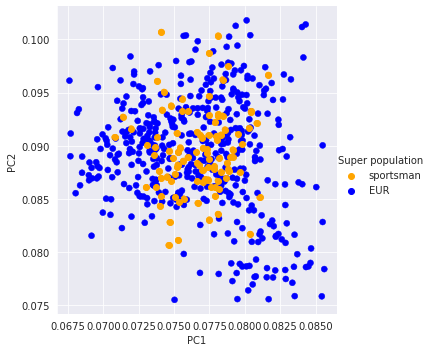

In [112]:
pca_filter_df = mt_filter.cols().flatten().to_pandas(flatten = True).rename(columns={'pheno.super_pop': 'super_pop'})
pca_filter_df[['PC1','PC2', 'PC3','PC4', 'PC5', 
                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10']] = pd.DataFrame(pca_filter_df.scores.tolist(), 
                                                                          index = pca_filter_df.index)
sns.relplot(x='PC1', 
            y='PC2', 
            hue='super_pop',
            palette=palette,
            edgecolor=None,
            data=pca_filter_df)._legend.set_title("Super population")
plt.scatter(pca_filter_df.query('super_pop == "sportsman"')['PC1'],
            pca_filter_df.query('super_pop == "sportsman"')['PC2'], color = "orange")


plt.savefig("/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/results/prs-plots/pca-filter.svg", 
            facecolor='white')

In [21]:
eigenvalues_filter, pcs_filter, _ = hl.hwe_normalized_pca(mt_filter.GT)

2021-12-20 15:31:54 Hail: INFO: hwe_normalize: found 22744 variants after filtering out monomorphic sites.
2021-12-20 15:31:56 Hail: INFO: pca: running PCA with 10 components... 5) / 327]


In [22]:
print(eigenvalues_filter)
pcs_filter.show(5, width=100)
mt_second_pca = mt_filter.annotate_cols(scores = pcs_filter[mt_filter.s].scores)

[2.893186787305391, 2.014405975817248, 1.7109307821570439, 1.6607276439772813, 1.6420614758280916, 1.6287988341702053, 1.6223625694248254, 1.6158915940633052, 1.6082058266623929, 1.5904868100361387]


,
s,scores
str,array<float64>
"""B102""","[-1,62e-01,3,53e-02,-8,02e-03,8,70e-03,5,85e-03,-2,89e-03,1,13e-02,-6,67e-03,-2,70e-03,9,47e-03]"
"""B156""","[-1,30e-01,3,89e-02,-2,88e-03,9,33e-03,-2,50e-03,-7,83e-03,-5,48e-03,-2,94e-03,-1,16e-03,6,65e-03]"
"""B24""","[-1,43e-01,4,61e-02,-7,98e-03,1,07e-02,-8,63e-03,-7,85e-03,-4,38e-03,2,32e-03,3,73e-03,-8,30e-03]"
"""B338""","[-1,62e-01,4,09e-02,-6,82e-03,1,49e-03,-6,36e-03,-2,14e-03,4,59e-03,-4,07e-03,5,00e-03,-3,41e-03]"
"""B382""","[-1,50e-01,3,63e-02,4,20e-03,5,20e-03,-3,00e-03,7,08e-03,4,41e-04,1,71e-03,-8,25e-04,2,11e-03]"


In [23]:
plot_second_pca = hl.plot.scatter(mt_second_pca.scores[1],
                                    mt_second_pca.scores[2],
                                    label=mt_second_pca.pheno.super_pop,
                                    colors=mapper,
                                    title='PCA', xlabel='PC2', ylabel='PC3')
show(plot_second_pca)

2021-12-20 16:15:28 Hail: INFO: Coerced sorted dataset


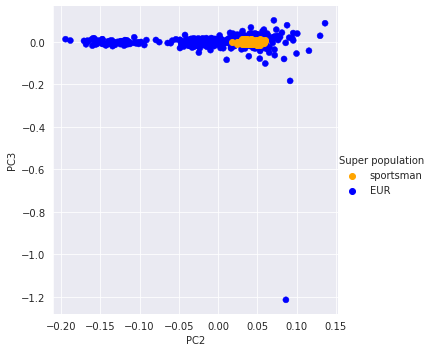

In [66]:
second_pca_df = mt_second_pca.cols().flatten().to_pandas(flatten = True).rename(columns={'pheno.super_pop': 'super_pop'})
second_pca_df[['PC1','PC2', 'PC3','PC4', 'PC5', 
                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10']] = pd.DataFrame(second_pca_df.scores.tolist(), 
                                                                          index = second_pca_df.index)
sns.relplot(x='PC2', 
            y='PC3', 
            hue='super_pop',
            palette=palette,
            edgecolor=None,
            data=second_pca_df)._legend.set_title("Super population")
plt.scatter(second_pca_df.query('super_pop == "sportsman"')['PC2'],
            second_pca_df.query('super_pop == "sportsman"')['PC3'], color = "orange")


plt.savefig("/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/results/prs-plots/second-pca.svg", 
            facecolor='white')

In [48]:
mad_second_pc2 = hl.median(
    hl.abs(
        hl.median(
            mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop == "sportsman")
            .scores[1].collect())-mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman")
        .scores[1]
    ).collect())
mad_second_pc3 =  hl.median(
    hl.abs(
        hl.median(
            mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop == "sportsman")
            .scores[2].collect())-mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman")
        .scores[2]
    ).collect())

In [49]:
mad_second_pc2.show()
mad_second_pc3.show()

""
""
float64
"5,58e-03"


""
""
float64
"4,30e-03"


In [50]:
# filter data near MAD for sportsmen
mt_second_filter = mt_second_pca.filter_cols(
    (mt_second_pca.scores[1] > hl.median(mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman").scores[1].collect()) - 5*mad_second_pc2) &
    (mt_second_pca.scores[1] < hl.median(mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman").scores[1].collect()) + 5*mad_second_pc2) &
    (mt_second_pca.scores[2] > hl.median(mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman").scores[2].collect()) - 5*mad_second_pc3) &
    (mt_second_pca.scores[2] < hl.median(mt_second_pca.filter_cols(mt_second_pca.pheno.super_pop=="sportsman").scores[2].collect()) + 5*mad_second_pc3)
)


In [51]:
mt_second_filter.count()

(78280, 198)

In [52]:
mt_second_filter.aggregate_cols(hl.agg.counter(mt_second_filter.pheno.super_pop))

frozendict({'EUR': 98, 'sportsman': 100})

In [53]:
plot_second_filter = hl.plot.scatter(mt_second_filter.scores[1],
                                     mt_second_filter.scores[2],
                                     label=mt_second_filter.pheno.super_pop,
                                     colors=mapper,
                                     title='PCA', xlabel='PC2', ylabel='PC3')

show(plot_second_filter)


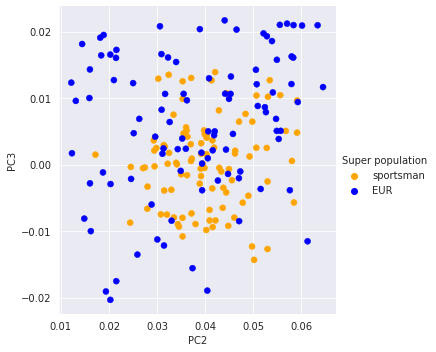

In [113]:
pca_second_filter_df = mt_second_filter.cols().flatten().to_pandas(flatten = True)
pca_second_filter_df[['PC1','PC2', 'PC3','PC4', 'PC5', 
                      'PC6', 'PC7', 'PC8', 'PC9', 'PC10']] = pd.DataFrame(pca_second_filter_df.scores.tolist(), 
                                                                          index = pca_second_filter_df.index)
sns.relplot(x='PC2', 
            y='PC3', 
            hue='pheno.super_pop', 
            palette=palette,
            edgecolor=None,
            data=pca_second_filter_df)._legend.set_title("Super population")
plt.savefig("/net/archive/groups/plggneuromol/matzieb/projects/imdik-zekanowski-sportwgs/results/prs-plots/pca-second-filter.svg", 
            facecolor='white')

In [ ]:
# save metadata with sportsmen and control to tsv file
sportsmen_control_pheno = mt_second_filter.cols()

sportsmen_control_pheno = sportsmen_control_pheno.annotate(group = sportsmen_control_pheno.pheno.group.replace("1kg", "control"))

sportsmen_control_pheno = sportsmen_control_pheno.drop(sportsmen_control_pheno.scores).flatten()

sportsmen_control_pheno = sportsmen_control_pheno.drop(sportsmen_control_pheno['pheno.group']).rename({
    's':'sample',
    'pheno.pop': 'pop', 
    'pheno.super_pop': 'super_pop', 
    'pheno.gender':'gender'}).export(
    '/net/archive/groups/plggneuromol/imdik-zekanowski-sportwgs/data/prs-data/sportsmen-control-pheno.tsv',
    header=True
)